# Rapport des travaux sur la base de données pour BottleNeck

Problématiques initiales rencontrées par l'entreprise :
- mettre en relation les données à disposition pour obtenir un ensemble cohérent et complet
- obtenir une estimation fiable du chiffre d'affaires
- rechercher et mettre en avant les données atypiques de la base

## Première partie : la construction du jeu de données

A partir des données mises à disposition par Laurent ainsi que de Sylvie, on procède en trois étapes :
- une conversion des fichiers en un format adapté aux modifications
- une analyse des fichiers pour trouver les points pouvant poser problème et les corriger
- une mise en relation de l'ensemble

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
erp = pd.read_excel("erp.xlsx")
liaison = pd.read_excel("liaison.xlsx")
web = pd.read_excel("web.xlsx")

C:\Users\jeffs\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\jeffs\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\jeffs\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
erp.to_csv("erp.csv",index=None,header=True)
liaison.to_csv("liaison.csv",index=None,header=True)
web.to_csv("web.csv",index=None,header=True)

In [4]:
erp = pd.read_csv("erp.csv")
liaison = pd.read_csv("liaison.csv")
web = pd.read_csv("web.csv")

### Analyse des fichiers

In [5]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [6]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [7]:
web.dtypes

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

Après observation, on propose la liste de modifications suivantes : 
- mettre en place la correction proposée par Sylvie pour mettre en relation la table de liaison avec les deux autres jeux de données
- modifier le type des dates pour permettre une lecture correcte
- modifier les noms d'auteur en object pour faciliter les opérations de recherche

In [8]:
web.rename(columns={"sku":"id_web"},inplace=True)

In [9]:
web["post_date"] = pd.to_datetime(web["post_date"], yearfirst= True)
web["post_date_gmt"] = pd.to_datetime(web["post_date_gmt"], yearfirst= True)
web["post_modified"] = pd.to_datetime(web["post_modified"], yearfirst= True)
web["post_modified_gmt"] = pd.to_datetime(web["post_modified_gmt"], yearfirst= True)
web["post_author"] = web["post_author"].astype(object)

In [10]:
web.dtypes

id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                      object
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


Une fois les modifications effectuées, on procède à un tri pour conserver les données pertinentes :
- on procède à une sélection des colonnes pertinentes pour l'analyse de données que l'on stocke dans une variable modifiable au besoin
- on constate que le post-type "attachment" est utilisé par le site internet pour l'affichage des images, on applique donc un filtre pour ne conserver que les données produits

In [11]:
web_columns = ["id_web","total_sales","post_type","post_name"]
web = web[web_columns]
web

,id_web,total_sales,post_type,post_name
0,bon-cadeau-25-euros,10.0,product,bon-cadeau-de-25-euros
1,15298,6.0,product,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,product,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,product,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,product,pierre-jean-villa-igp-gamine-2018
...,...,...,...,...
1508,16135,5.0,attachment,mouthes-le-bihan-aime-chai-2015
1509,15891,0.0,attachment,camin-larredya-jurancon-sec-la-virada-2018
1510,15887,0.0,attachment,jamet-cote-rotie-fructus-voluptas-2018
1511,13127-1,0.0,attachment,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [12]:
web["post_type"].value_counts()

product       716
attachment    714
Name: post_type, dtype: int64

In [13]:
web.loc[web["post_type"] == "attachment"]

,id_web,total_sales,post_type,post_name
799,15298,6.0,attachment,pierre-jean-villa-saint-joseph-preface-2018
800,15296,0.0,attachment,pierre-jean-villa-saint-joseph-tilde-2017
801,15300,0.0,attachment,pierre-jean-villa-croze-hermitage-accroche-coe...
802,19814,3.0,attachment,pierre-jean-villa-igp-gamine-2018
803,19815,0.0,attachment,pierre-jean-villa-cote-rotie-carmina-2017
...,...,...,...,...
1508,16135,5.0,attachment,mouthes-le-bihan-aime-chai-2015
1509,15891,0.0,attachment,camin-larredya-jurancon-sec-la-virada-2018
1510,15887,0.0,attachment,jamet-cote-rotie-fructus-voluptas-2018
1511,13127-1,0.0,attachment,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


- Une fois le fichier web préparé, on effectue une recherche supplémentaire pour isoler les éventuelles valeurs nulles
- Cette recherche nous montre la présence de deux bouteilles n'ayant pas de clé id web dans la table web. Ces dernières n'ont pas de ventes associées, aussi on décide de les supprimer du jeu de données, mais il reste important de leur créer un id-web afin d'éviter des conflits d'intégrité ultérieurs de la base

In [14]:
web = web.loc[web["post_type"] == "product"]
web.isnull().sum()

id_web         2
total_sales    0
post_type      0
post_name      0
dtype: int64

In [15]:
web.loc[web["id_web"].isnull()]

,id_web,total_sales,post_type,post_name
470,NaN,0.0,product,pierre-jean-villa-cote-rotie-fongeant-2017
471,NaN,0.0,product,pierre-jean-villa-condrieu-suspendu-2018


In [16]:
web.dropna(subset=["id_web"],inplace=True)
web

C:\Users\jeffs\AppData\Local\Temp\ipykernel_10232\150037918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web.dropna(subset=["id_web"],inplace=True)


,id_web,total_sales,post_type,post_name
0,bon-cadeau-25-euros,10.0,product,bon-cadeau-de-25-euros
1,15298,6.0,product,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,product,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,product,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,product,pierre-jean-villa-igp-gamine-2018
...,...,...,...,...
762,16135,5.0,product,mouthes-le-bihan-aime-chai-2015
767,15891,0.0,product,camin-larredya-jurancon-sec-la-virada-2018
768,15887,0.0,product,jamet-cote-rotie-fructus-voluptas-2018
797,13127-1,0.0,product,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


### Mise en place du jeu de données

On procède en deux étapes
- On fusionne erp et liaison en utilisant product_id comme clé commune
- On assemble ensuite le fichier obtenu avec web en utilisant id_web comme clé commune

In [17]:
erp_liaison = pd.merge(
    left=erp,
    right=liaison,
    left_on="product_id",
    right_on="product_id",
    how="left"
)
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


- Le nombre d'éléments dans la table erp-liaison ne correspondant pas avec celui de la table web, on procède à une nouvelle recherche pour comprendre la source du problème
- Après analyse, on trouve une liste de produits n'ayant pas d'id-web associé dans la table de liaison. Il s'agit de l'ensemble des produits disponibles en boutique qui ne sont pas disponibles sur le site Internet.
- On décide par contre de garder l'ensemble des produits concernés dans une liste et de les retirer du jeu de données en attendant une décision ultérieure.

In [18]:
produits_sans_idweb = erp_liaison.loc[erp_liaison["id_web"].isnull()]
produits_sans_idweb

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
19,4055,0,86.1,0,outofstock,NaN
49,4090,0,73.0,0,outofstock,NaN
50,4092,0,47.0,0,outofstock,NaN
119,4195,0,14.1,0,outofstock,NaN
131,4209,0,73.5,0,outofstock,NaN
...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,NaN
818,7200,0,31.0,6,instock,NaN
819,7201,0,31.0,18,instock,NaN
820,7203,0,45.0,30,instock,NaN


In [19]:
erp_liaison.dropna(subset=["id_web"],inplace=True)
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
792,7023,1,27.5,15,instock,15891
793,7025,1,69.0,2,instock,15887
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [20]:
bdd = pd.merge(erp_liaison,web, how="right", on=["id_web"])
bdd.drop(columns=("post_type"),inplace=True)
bdd

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_name
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015
710,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
711,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
712,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


## Deuxième partie : évaluation du chiffre d'affaires et des ventes

On commence tout d'abord par ajouter une colonne supplémentaire à notre base de données permettant d'évaluer le chiffre d'affaires pour chaque produit, ainsi que le chiffre d'affaires total de l'entreprise.

In [21]:
bdd["Chiffre d'affaires par produit"] = bdd["price"] * bdd["total_sales"]
bdd

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_name,Chiffre d'affaires par produit
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,250.0
1,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
2,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
3,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
4,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,42.3
...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015,42.0
710,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.0
711,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,0.0
712,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


In [22]:
chiffre_affaires_total = bdd["Chiffre d'affaires par produit"].sum()
print("Le chiffre d'affaires total de l'entreprise est de",chiffre_affaires_total,"euros.")

Le chiffre d'affaires total de l'entreprise est de 70568.6 euros.


Afin de mieux évaluer la situation de l'entreprise, on se propose de se doter de deux outils :
- le premier est un graphique mettant en corrélation le prix de l'article avec le nombre de ventes associé, ainsi que de visualiser d'éventuelles ruptures de stocks
- le second est un tableau permettant d'évaluer l'ensemble des produits n'ayant pas généré de ventes, bien qu'en disposant en stock

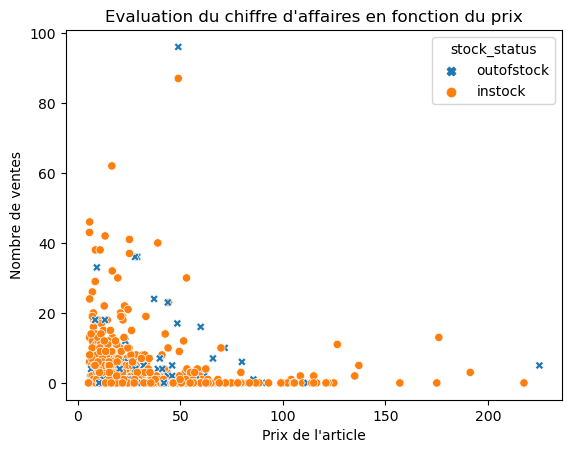

In [23]:
sns.scatterplot(data=bdd,
                x="price",
                y="total_sales",
                hue="stock_status",
                style="stock_status",
                hue_order=("outofstock","instock"))
plt.xlabel("Prix de l'article")
plt.ylabel("Nombre de ventes")
plt.title("Evaluation du chiffre d'affaires en fonction du prix")
plt.show()

In [24]:
produits_non_vendus = bdd.loc[(bdd["total_sales"] == 0) & (bdd["stock_status"] == "instock")]
produits_non_vendus.sort_values("price",ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_name,Chiffre d'affaires par produit
426,5001,1,217.5,20,instock,14581,0.0,david-duband-charmes-chambertin-grand-cru-2014,0.0
553,5767,1,175.0,12,instock,15185,0.0,camille-giroud-clos-de-vougeot-2016,0.0
222,4406,1,157.0,3,instock,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0
511,5612,1,124.8,12,instock,14915,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0
603,5917,1,122.0,4,instock,14775,0.0,wemyss-malts-single-cask-scotch-whisky-choc-n-...,0.0
...,...,...,...,...,...,...,...,...,...
337,4755,1,7.4,97,instock,16132,0.0,domaine-de-montgilet-vin-de-france-grolleau-2019,0.0
330,4739,1,7.4,50,instock,14366,0.0,jean-paul-brun-beaujolais-le-ronsay-2016,0.0
119,4198,1,5.8,105,instock,16322,0.0,moulin-gassac-igp-pays-herault-guilhem-rouge-2019,0.0
560,5777,1,5.7,132,instock,14338,0.0,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0


In [25]:
round(bdd["price"].describe(),3)

count    714.000
mean      32.493
std       27.811
min        5.200
25%       14.100
50%       23.550
75%       42.175
max      225.000
Name: price, dtype: float64

In [26]:
coefficientasymetrie = round(bdd["price"].skew(),3)
print(coefficientasymetrie)

2.581


A partir de cette analyse, nous avons à notre disposition les informations suivantes :
- le prix minimum observé est de 5 euros, le maximum de 225 euros
- la moyenne des prix se situe à 32,493 euros, avec un écart-type de 27,811 euros
- la médiane des prix se trouve à 23,55 euros (en d'autres termes, 50 % des prix enregistrés se trouvent en-dessous de cette valeur)
- on notera également que 25 % des prix enregistrés sont inférieurs à 14,1 euros et que 75 % sont inférieurs à 42,15 euros
- enfin, le tableau des prix présente un coefficient d'asymétrie de 2,581 (en d'autres termes, une grande majorité des prix dépasse celui de la moyenne)
Pour synthétiser l'ensemble de ces informations, on se dote d'un histogramme permettant de visualiser ces informations.

Text(0.5, 1.0, 'Répartition des prix au sein de la base de données')

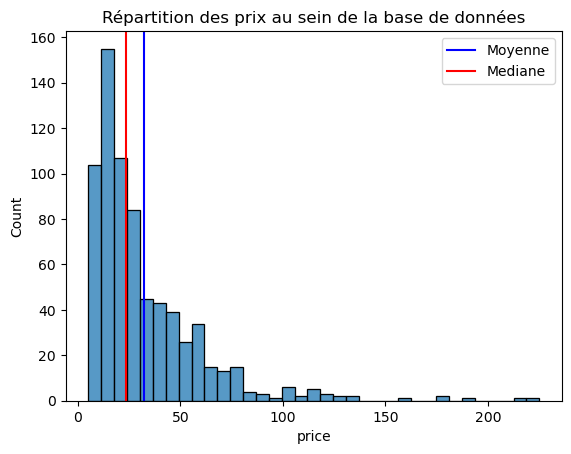

In [27]:
moyenne = bdd["price"].mean()
mediane = bdd["price"].median()
sns.histplot(data=bdd["price"])
plt.axvline(moyenne, color="blue", linestyle="-")
plt.axvline(mediane, color="red", linestyle="-")
plt.legend({"Moyenne":moyenne,"Mediane":mediane})
plt.title("Répartition des prix au sein de la base de données")

## Troisième partie : analyse des produits atypiques

Afin d'évaluer les prix atypiques, que l'on définit comme l'ensemble des prix s'éloignant significativement de la moyenne, on se propose une approche par la méthode d'écart interquartile.
- On pose tout d'abord un graphique permettant de mettre en valeur les différents prix disponibles
- A partir des interquartiles récupérés précédemment, on calcule deux nouvelles bornes en y ajoutant / soustrayant l'écart interquartile.
- Une fois le calcul effectué, on construit un tableau composé de l'ensemble des valeurs dépassant les nouvelles bornes

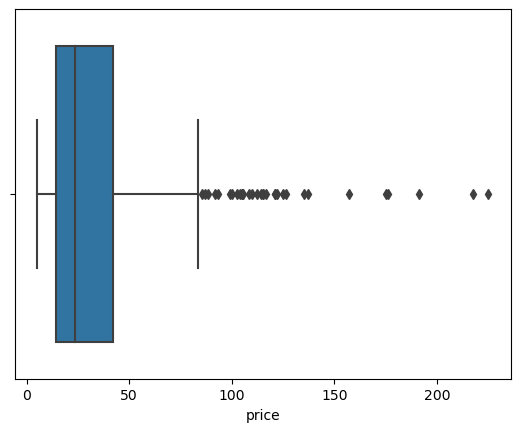

In [45]:
representation_graphique_prix = sns.boxplot(x=bdd["price"])

In [28]:
q1 = bdd["price"].quantile(q=0.25)
q3 = bdd["price"].quantile(q=0.75)
ecart_interquartile = q3 - q1
valeurtest1 = q1 - 1.5*ecart_interquartile
valeurtest2 = q3 + 1.5*ecart_interquartile
print(valeurtest1)
print(valeurtest2)

-28.012500000000003
84.28750000000001


Les prix étant par définition positifs, on peut exclure la borne inférieure sans souci.
Pour dresser un tableau des prix problématiques, on construit alors une liste de tous les produits dont le prix dépasse la borne supérieure.

In [29]:
prix_atypiques = bdd.loc[bdd["price"] > valeurtest2]
prix_atypiques.sort_values("price",ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_name,Chiffre d'affaires par produit
200,4352,1,225.0,0,outofstock,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0
426,5001,1,217.5,20,instock,14581,0.0,david-duband-charmes-chambertin-grand-cru-2014,0.0
587,5892,1,191.3,10,instock,14983,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,573.9
219,4402,1,176.0,8,instock,3510,13.0,cognac-frapin-vip-xo,2288.0
553,5767,1,175.0,12,instock,15185,0.0,camille-giroud-clos-de-vougeot-2016,0.0
222,4406,1,157.0,3,instock,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0
382,4904,1,137.0,13,instock,14220,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,685.0
642,6126,1,135.0,10,instock,14923,2.0,champagne-gosset-celebris-vintage-2007,270.0
202,4355,1,126.5,2,instock,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5
511,5612,1,124.8,12,instock,14915,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0


Après analyse, on s'aperçoit que de nombreuses références dans le catalogue parmi les prix atypiques sont disponibles en stock, mais n'ont pas nécessairement produit de chiffre d'affaires. On se propose par conséquent d'isoler l'ensemble des produits atypiques n'ayant pas généré de ventes.

In [30]:
produits_atypiques_non_vendus = prix_atypiques.loc[(prix_atypiques["total_sales"] == 0) & (prix_atypiques["stock_status"] == "instock")]
produits_atypiques_non_vendus.sort_values("price",ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_name,Chiffre d'affaires par produit
426,5001,1,217.5,20,instock,14581,0.0,david-duband-charmes-chambertin-grand-cru-2014,0.0
553,5767,1,175.0,12,instock,15185,0.0,camille-giroud-clos-de-vougeot-2016,0.0
222,4406,1,157.0,3,instock,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0
511,5612,1,124.8,12,instock,14915,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0
603,5917,1,122.0,4,instock,14775,0.0,wemyss-malts-single-cask-scotch-whisky-choc-n-...,0.0
654,6213,1,121.0,7,instock,15072,0.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0
657,6216,1,121.0,6,instock,15070,0.0,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0
648,6202,1,116.4,14,instock,15126,0.0,domaine-clerget-echezeaux-en-orveaux-2015,0.0
656,6215,1,115.0,4,instock,12790,0.0,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0
604,5918,1,114.0,8,instock,14773,0.0,wemyss-malts-single-cask-scotch-whisky-chai-ca...,0.0


Pour évaluer la part des produits atypiques dans l'ensemble des produits proposés par l'entreprise, on se propose de construire un diagramme mettant en avant ces informations.

In [31]:
compte_produits_atypiques = prix_atypiques.shape[0]
compte_produits_total = bdd.shape[0]
print(compte_produits_atypiques)
print(compte_produits_total)

32
714


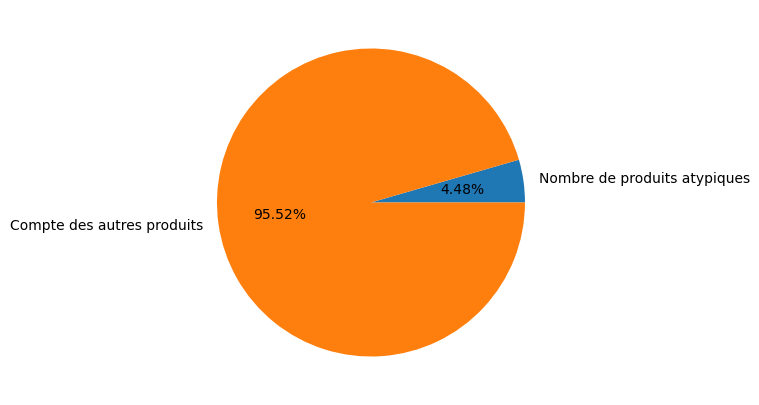

In [32]:
plt.figure(figsize = (5, 5))
x = [compte_produits_atypiques, compte_produits_total-compte_produits_atypiques]
plt.pie(x, labels = ['Nombre de produits atypiques', 'Compte des autres produits'], normalize = True,autopct='%1.2f%%')
plt.show()

Afin de récapituler l'ensemble des informations acquises, on se dote d'un nouveau graphique en nuage de points permettant d'évaluer le comportement de vente des produits atypiques.

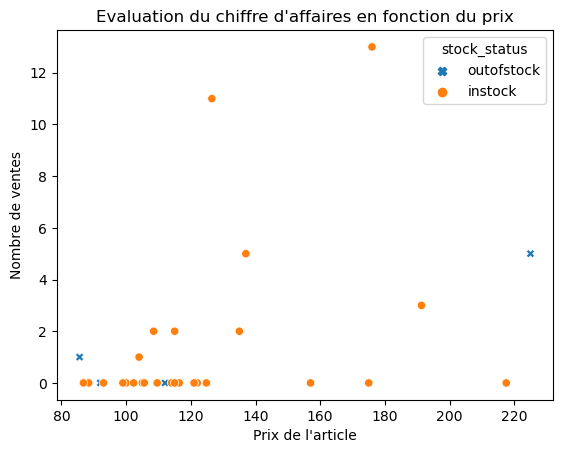

In [33]:
sns.scatterplot(data=prix_atypiques,
                x="price",
                y="total_sales",
                hue="stock_status",
                style="stock_status",
                hue_order=("outofstock","instock"))
plt.xlabel("Prix de l'article")
plt.ylabel("Nombre de ventes")
plt.title("Evaluation du chiffre d'affaires en fonction du prix")
plt.show()

## Quatrième partie : le classement des meilleures ventes

Enfin, pour conclure notre analyse, on se propose de se doter de deux outils :
- un tableau permettant de mettre en valeur les produits ayant généré le plus de chiffre d'affaires, ainsi que de repérer ceux nécessitant un réapprovisionnement en stock
- un diagramme permettant d'évaluer l'impact des produits atypiques sur les ventes totales de l'entreprise.

In [34]:
meilleures_ventes = bdd.sort_values("Chiffre d'affaires par produit",ascending=False)
meilleures_ventes.head(n=10)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_name,Chiffre d'affaires par produit
195,4334,1,49.0,0,outofstock,7818,96.0,champagne-gosset-grand-blanc-de-blanc,4704.0
72,4144,1,49.0,11,instock,1662,87.0,champagne-gosset-grand-rose,4263.0
219,4402,1,176.0,8,instock,3510,13.0,cognac-frapin-vip-xo,2288.0
71,4142,1,53.0,8,instock,11641,30.0,champagne-gosset-grand-millesime-2006,1590.0
70,4141,1,39.0,1,instock,304,40.0,gosset-champagne-grande-reserve,1560.0
202,4355,1,126.5,2,instock,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5
200,4352,1,225.0,0,outofstock,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0
80,4153,1,29.0,0,outofstock,16237,36.0,elian-daros-cotes-du-marmandais-clos-baquey-2015,1044.0
651,6206,1,25.2,120,instock,16580,41.0,domaine-giudicelli-patrimonio-blanc-2019,1033.2
31,4068,1,16.6,157,instock,16416,62.0,gilles-robin-crozes-hermitage-papillon-2019,1029.2


In [35]:
prix_atypiques_total = prix_atypiques["Chiffre d'affaires par produit"].sum()
print(prix_atypiques_total)

6970.0


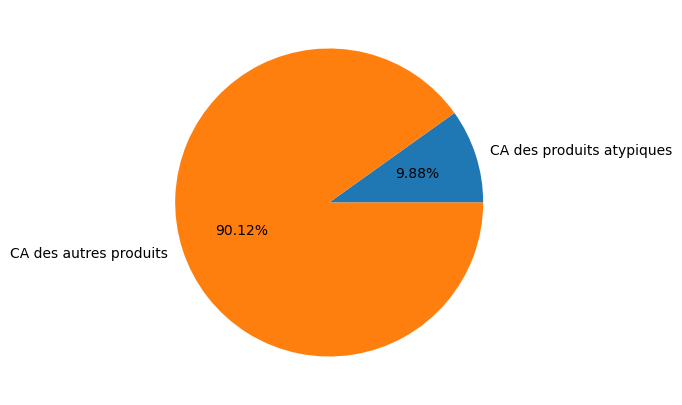

In [36]:
plt.figure(figsize = (5, 5))
x = [prix_atypiques_total, chiffre_affaires_total-prix_atypiques_total]
plt.pie(x, labels = ['CA des produits atypiques', 'CA des autres produits'], normalize = True,autopct='%1.2f%%')
plt.show()

Nous pouvons ainsi constater que bien que les produits atypiques ne représentent que 4,48% de la carte de l'entreprise, ils participent cependant à hauteur de 9,88% du chiffre d'affaires total, ce qui constitue une proportion non négligeable.
Pour apporter une autre perspective à ces derniers, nous pouvons également proposer une analyse des produits atypiques avec un outil supplémentaire, le z-score.

## Dernière partie : une analyse des produits atypiques par le z-score

Pour metttre en place une analyse des prix atypiques à partir de la méthode du z-score, nous avons deux options à notre disposition :
- importer la librairie scipy qui intègre la formule appropriée
- calculer directement le z-score à partir de Pandas
Cette méthode permet d'analyser le prix en prenant en compte la moyenne des prix ainsi que l'écart-type.
Une fois les calculs effectués, on se propose de construire un tableau répertoriant l'ensemble des produits dont le z-score dépasse un seuil donné (on choisit ici 2,5 mais il peut être modifié au besoin).

In [37]:
import scipy as scipy
scipy.stats.zscore(bdd["price"], axis=0, ddof=0, nan_policy='propagate')

0     -0.269624
1     -0.298410
2      0.065016
3     -0.420752
4     -0.661837
         ...   
709   -0.866939
710   -0.179667
711    1.313620
712    0.802664
713   -0.582675
Name: price, Length: 714, dtype: float64

In [38]:
(bdd["price"] - bdd["price"].mean()) / bdd["price"].std()

0     -0.269435
1     -0.298201
2      0.064970
3     -0.420457
4     -0.661373
         ...   
709   -0.866332
710   -0.179541
711    1.312700
712    0.802101
713   -0.582267
Name: price, Length: 714, dtype: float64

In [39]:
bdd["zscore"] = (bdd["price"] - bdd["price"].mean()) / bdd["price"].std()
tableau_outliers_zscores = bdd.loc[bdd["zscore"]>2.5]
tableau_outliers_zscores.sort_values("zscore",ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_name,Chiffre d'affaires par produit,zscore
200,4352,1,225.0,0,outofstock,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0,6.922087
426,5001,1,217.5,20,instock,14581,0.0,david-duband-charmes-chambertin-grand-cru-2014,0.0,6.652405
587,5892,1,191.3,10,instock,14983,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,573.9,5.710315
219,4402,1,176.0,8,instock,3510,13.0,cognac-frapin-vip-xo,2288.0,5.160164
553,5767,1,175.0,12,instock,15185,0.0,camille-giroud-clos-de-vougeot-2016,0.0,5.124206
222,4406,1,157.0,3,instock,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,4.476969
382,4904,1,137.0,13,instock,14220,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,685.0,3.757817
642,6126,1,135.0,10,instock,14923,2.0,champagne-gosset-celebris-vintage-2007,270.0,3.685902
202,4355,1,126.5,2,instock,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5,3.380262
511,5612,1,124.8,12,instock,14915,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0,3.319134


In [46]:
compte_zscore = tableau_outliers_zscores.shape[0]
print(compte_zscore)

25


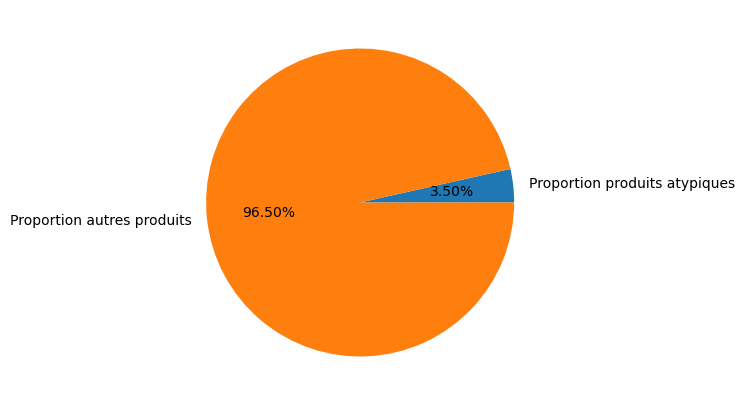

In [41]:
plt.figure(figsize = (5, 5))
x = [compte_zscore, compte_produits_total-compte_zscore]
plt.pie(x, labels = ['Proportion produits atypiques', 'Proportion autres produits'], normalize = True,autopct='%1.2f%%')
plt.show()

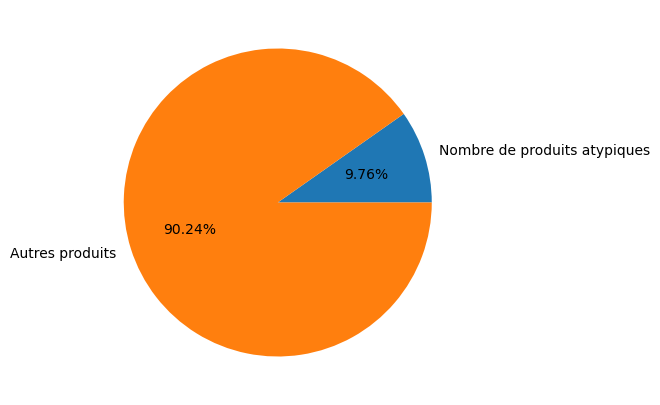

In [44]:
ca_zscore = tableau_outliers_zscores["Chiffre d'affaires par produit"].sum()
plt.figure(figsize = (5, 5))
x = [ca_zscore, chiffre_affaires_total-ca_zscore]
plt.pie(x, labels = ['Nombre de produits atypiques', 'Autres produits'], normalize = True,autopct='%1.2f%%')
plt.show()

Pour finir, on peut remarquer que bien que ces analyses permettent de mettre en avant des prix atypiques au sein de la base de données, nous n'avons cependant pas rencontré de valeurs aberrantes, telles que des bouteilles ayant des ventes négatives ou des prix anormalement élevés. On peut donc en conclure que la base de données est fiable en l'état.